# Portfolio assignment 13: bivariate analysis on penguins dataset - categorical vs. categorical
Do a bivariate analysis on the penguins dataset for the following combinations of columns.
- species vs sex
- island vs sex

For this bivariate analysis, at least perform the following tasks:
- Do you expect their to be a correlation between the two columns?
- Create a contigency table. Do you observe different ratios between categories here?
- Create a bar plot for this contigency table. Do you observe different ratios between categories here?
- Do a chi-squared test. What does the result say? What's teh chance of there being a correlation between the two columns?

In [1]:
import pandas as pd
import seaborn as sns
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


### Values

<AxesSubplot:>

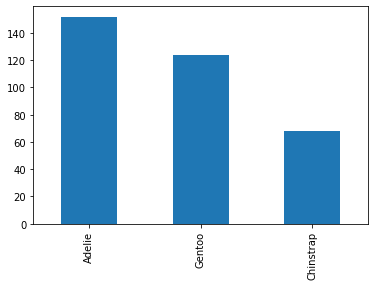

In [2]:
penguins.species.value_counts().plot(kind='bar')

<AxesSubplot:>

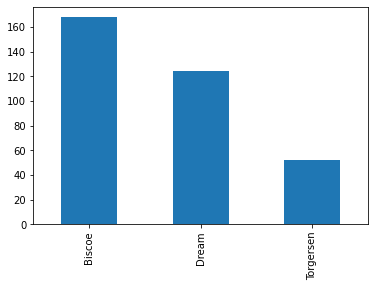

In [3]:
penguins.island.value_counts().plot(kind='bar')

<AxesSubplot:>

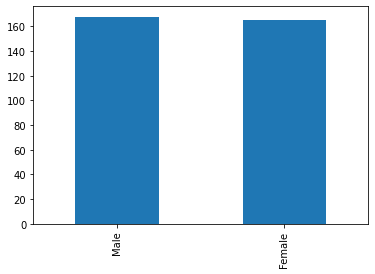

In [4]:
penguins.sex.value_counts().plot(kind='bar')

## Bivariate analysis - categorical vs. categorical

In [5]:
from scipy.stats import chi2_contingency

### Example: Species vs. island

In [6]:
contingencyTable = penguins.groupby(['species','island']).size().unstack('species', fill_value=0)
contingencyTable

species,Adelie,Chinstrap,Gentoo
island,,,
Biscoe,44,0,124
Dream,56,68,0
Torgersen,52,0,0


<AxesSubplot:xlabel='island'>

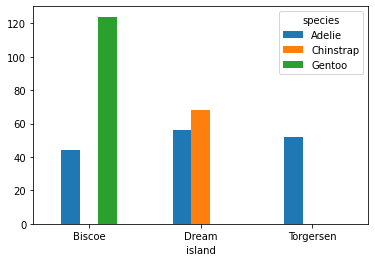

In [7]:
contingencyTable.plot(kind='bar', rot=0)

In [8]:
chi2_contingency(contingencyTable)

(299.55032743148195,
 1.3545738297192517e-63,
 4,
 array([[74.23255814, 33.20930233, 60.55813953],
        [54.79069767, 24.51162791, 44.69767442],
        [22.97674419, 10.27906977, 18.74418605]]))

### Species vs. sex

I expect their to be a correlation between the two columns because I think that with every specie there are both male and female penguins.

In [9]:
contingencyTable1 = penguins.groupby(['species','sex']).size().unstack('species', fill_value=0)
contingencyTable1

species,Adelie,Chinstrap,Gentoo
sex,,,
Female,73,34,58
Male,73,34,61


As you can observe the ratio between the categories are different. The Adelie specie is the biggest specie from the three with the most male and female penguins, Gentoo is the second biggest specie and the Chinstrap is the smallest specie.

<AxesSubplot:xlabel='sex'>

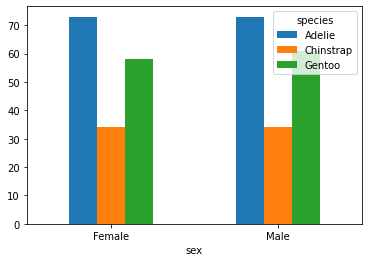

In [10]:
contingencyTable1.plot(kind='bar', rot=0)

As you can see there is the same ratio between the categories as the previous table. The Adelie specie is the biggest specie from the three with the most male and female penguins, Gentoo is the second biggest specie and the Chinstrap is the smallest specie.

In [11]:
chi2_contingency(contingencyTable1)

(0.04860717014078319,
 0.9759893689765846,
 2,
 array([[72.34234234, 33.69369369, 58.96396396],
        [73.65765766, 34.30630631, 60.03603604]]))

According to the chi-squared test, there is a 97,6% chance there is no correlation between sex and species. As you can notice in the barplot, there are almost no difference.

### Island vs. sex

I expect their to be a correlation between the two columns because I think that on every island there are both male and female penguins.

In [12]:
contingencyTable2 = penguins.groupby(['island','sex']).size().unstack('island', fill_value=0)
contingencyTable2

island,Biscoe,Dream,Torgersen
sex,,,
Female,80,61,24
Male,83,62,23


As you can observe the ratio between the categories are different. On Biscoe island there are the most male and female penguins and on Torgersen island there are the least male and female penguins.

<AxesSubplot:xlabel='sex'>

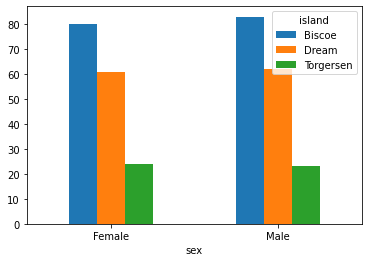

In [13]:
contingencyTable2.plot(kind='bar', rot=0)

As you can see there is the same ratio between the categories as the previous table. On Biscoe island there are the most male and female penguins and on Torgersen island there are the least male and female penguins.

In [14]:
chi2_contingency(contingencyTable2)

(0.05759904881286206,
 0.971611229281065,
 2,
 array([[80.76576577, 60.94594595, 23.28828829],
        [82.23423423, 62.05405405, 23.71171171]]))

According to the chi-squared test, there is a 97,1% chance there is no correlation between sex and island. As you can notice in the barplot, there are almost no difference.